# Fake Review Generation on the Yelp Dataset

More information on the Yelp dataset: https://www.yelp.com/dataset

In [ ]:
!python3 -V

Python 3.8.15


In [ ]:
!pip3 install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install transformers
!pip install fastai==2.2.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1 MB 1.3 MB/s eta 0:04:18tcmalloc: large alloc 1147494400 bytes == 0x39c5a000 @  0x7fac4cb1f615 0x5d631c 0x51e4f1 0x51e67b 0x4f7585 0x49ca7c 0x4fdff5 0x49caa1 0x4fdff5 0x49ced5 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x5d7c18 0x5d9412 0x586636 0x5d813c 0x55f3fd 0x55e571 0x5d7cf1 0x49ced5 0x55e571 0x5d7cf1 0x49ec69 0x5d7c18 0x49ca7c 0x4fdff5 0x49ced5
     |█████████████████████████████▏  | 1055.7 MB 1.2 MB/s eta 0:01:24tcmalloc: large alloc 1434370048 bytes == 0x7e2b0000 @  0x7fac4cb1f615 0x5d631c 0x51e4f1 0x51e67b 0x4f7585 0x49ca7c 0x4fdff5 0x49caa1 0x4fdff5 0x49ced5 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x5d7c18 0x5d9412 0x586636 0x5d813c 0x55f3fd 0x55e571 0x5d7cf1 0x49ced5 0x55e571 0x5d7cf1 0x49ec69 0x5d7c18 0x49ca7c 0x4fdff5 0x49ced5
     |█████

In [ ]:
import gc
import torch
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
from fastai.text.all import *

In [ ]:
print(torch. __version__)

1.7.1+cu110


In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
#!tar -xvf /content/drive/MyDrive/YelpDataset/yelp_dataset.tar

In [320]:
!ls /content/drive/MyDrive/YelpDataset/dataframes

AutoDF.pkl		     HealthMedicalDF.pkl  restaurantDF.pkl
beautyandSpaDF.pkl	     HomeServicesDF.pkl   shoppingDF.pkl
EventPlanningServicesDF.pkl  LocalServicesDF.pkl
foodDF.pkl		     NightlifeDF.pkl


In [ ]:
#%cp /content/yelp_academic_dataset_review.json /content/drive/MyDrive/YelpDataset

In [321]:
#%cp /content/drive/MyDrive/YelpDataset/yelp_academic_dataset_review.json /content/
%cp /content/drive/MyDrive/YelpDataset/dataframes/AutoDF.pkl /content/

In [322]:
import pandas as pd

In [323]:
df = pd.read_pickle('AutoDF.pkl')

In [324]:
df.shape

(184986, 15)

In [325]:
#process the yelp dataset in similar fashion to the amazon review dataset.
#we'll only need the text coloumn in our case
df_main = df[['text']]

In [326]:
df_main = df_main.rename(columns={'text': 'reviewText'})

In [327]:
df_main.head(20)

,reviewText
106213,"I went in to get shocks for my shell and not only did they have them in stock, the lovely Kim installed them for me! She was extremely professional and very friendly. I would recommend them to anyone."
106224,The absolute best service and results I've had & I have several vehicles. HIGHLY recommend!
106225,"I wrecked my car working for a delivery company; the front of it was absolutely smashed. My boss told me to take it to Ironhorse, even though I was pretty sure it was totaled at the time....so much for what I know...\n\nThe guys at Ironhorse took care of everything and now my car looks brand new. Craig was extremely friendly and gave me weekly progress updates. He even gave my a ride home so that I wouldn't have to take the bus! These guys are awesome! HIGHLY RECOMMEND!"
106226,"My first Yelp review ever, but decided I should let everyone know how good this shop is. We had some damage done to our car by a valet company, and Iron Horse did the repair. From the very beginning of the process Craig, one of the owners, was friendly, helpful and responsive. The customer service he gave us was exceptional, and the repair turned out flawless. I hope I never have damage to my car again, but if I do, I would definitely use Iron Horse again. Highly recommended to anyone needing a repair job."
106227,"Back story: I was rear ended on the spot on Castillo where there is always water in the underpass of freeway. You know where I mean, if you're from SB. And luckily guy had insurance AND pulled over to give info. (yes Hit and Runs happen even in Paradise)\nWent to one place for an estimate, but didn't seem busy and as professional bit 'rough around edges' let say.\n\nWent down street and found Iron Horse.\n\nAtmosphere: \nCraig greeted me as I came in. Nice man in a tie and dress shirt. We chatted a few minutes about V -Town (Ventura) and football. Very amiable man.\n\nWhat struck me, whic..."
106228,"I had a wonderful experience at Iron Horse when my brand new car was in a collision and needed some love! Craig and his crew are quick! My car was finished when it was promised, maybe even a few days early. Craig was generous enough to give me a ride to my rental car when I dropped my car off. And the work on my car is PERFECT. I have a dark silver/gray car and the paint job is blended perfectly. I am extremely pleased and absolutely will be returning to Iron Horse again if the need ever arises!"
106229,"1%ers who set a standard. I am a business owner on the east coast so I have no ulterior locally driven motive to give a good review. I deal with a lot of people and businesses. This locally owned and operated family business sets the standard for customer service, professionalism, quality work, communication and follow through. They not only made my cherished vehicle new again but went above and beyond for me. I rarely take the time to write reviews but it was a pleasure going out of my way to write this one. Do yourself a favor and go straight to these guys should you need their ser..."
106230,I have acid poop dropping birds living in the trees of my house and they are doing a number on my new vehicle paint job! My local chevy dealership recommended Iron Horse and told me to talk to Chris the owner. I came in and was a little nervous about what this would cost. Chris gave me the GREAT news that he would do this as a courtesy! When does that EVER happen? If I ever have great Auto Body needs this will be the place I will go. Super professional and amazing service in the front office.
106231,"This was going to be a five star review. After all, who am I to break a streak? BUT, it was not to be. After finding this particular Meineke online via Yelp (yay), I trusted enough to send my wife with the car to get an oil change. I found ON MEINEKE.COM the full synthetic package for 69.95, including hinge such as tire rotation for no extra charge! I was like, WHAT?!?!?!?!? Most non-jifflubey shops charge 80-90 for the oil and filter a

In [328]:
df_main.shape

(184986, 1)

In [329]:
#sample_size = len(df_main)

In [330]:
#we sample 100,000 since we sampled 5% for restaurants which gave us around 188k samples
sample_df = df_main.sample(n=100000, random_state=2021).dropna().reset_index()

In [331]:
sample_df.dtypes

index          int64
reviewText    object
dtype: object

In [332]:
del df_main
gc.collect()

26335

In [333]:
sample_df.shape

(100000, 2)

In [334]:
#Let's import the pretrained GPT2 model and the tokenizers
pretrained_weights = 'gpt2'
tokenizer = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model = GPT2LMHeadModel.from_pretrained(pretrained_weights)

In [335]:
device = torch.device("cuda")

In [336]:
model.to(device)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dro

In [337]:
from sklearn.model_selection import train_test_split

In [338]:
df_train, df_valid = train_test_split(sample_df, random_state=2021, test_size=0.1)

In [339]:
all_texts = np.concatenate([df_train["reviewText"].values, df_valid["reviewText"].values])

In [340]:
all_texts.shape

(100000,)

In [341]:
e = 0
toRemove = []
for i in range(len(all_texts)):
  if all_texts[i]=="":
    e+=1
    print(f"all_texts[{i}] is empty")
    all_texts[i] = 'a'
    toRemove.append(i)

print(f"Number of rows that are empty={e}. To remove indecies={toRemove}")

Number of rows that are empty=0. To remove indecies=[]


In [342]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [343]:
splits = [list(df_train.index), list(df_valid.index)]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)

In [ ]:
"""e = 0
for i in range(len(tls.train)):
  if tls.train[i].type() != 'torch.LongTensor':
    #print(f'tls.train[{i}] not a long tensor')
    #print(f'tls.train[{i}] is a {tls.train[i].type()}')
    e+=1
print("Total of e=",e," empty")"""

'e = 0\nfor i in range(len(tls.train)):\n  if tls.train[i].type() != \'torch.LongTensor\':\n    #print(f\'tls.train[{i}] not a long tensor\')\n    #print(f\'tls.train[{i}] is a {tls.train[i].type()}\')\n    e+=1\nprint("Total of e=",e," empty")'

In [344]:
tls.tfms(tls.train.items[0]).shape, tls.tfms(tls.valid.items[0]).shape

(torch.Size([276]), torch.Size([115]))

In [345]:
show_at(tls.train, 0)

These guys are awesome.  I called a while back in my quest to find the best price on a new windshield, since debris tractor-trailer on the NJ Turnpike kindly flew into my car leaving a hefty crack last year.

Anywho, when I called the Clear Vision the super-friendly man on the other end, Anthony, gave me a quote and was sure he wouldn't be beat.  Naturally a skeptic, I thanked him and continued to call around.  2 hours later, I called back.... that WAS the best price, by a mile.  Anthony was so friendly.  I wanted to have the repair done over the weekend, and he told me that normally they would do weekend jobs but his sister was getting married and they had to close down the shop.  I loved that this was a family run business.  Something about it just tickled me pink.

We ended up making an appointment for the following Monday, and I planned on bringing my car to their shop after my appointment at the dealership... and to my surprise they told me they would come right to the dealership 

In [346]:
show_at(tls.valid, 0)

I will never again go to the DMV. This is the best place to go to get your DMV needs done. Yes, they do tack on there own fee for each service, but I will gladly pay that for never having to step into another DMV as long as I live. Each time I go I am in and out within 25 min. The staff is always super friendly, and will answer any questions that you may have. Another plus is they are open on Saturday, which is so hard to find. I will continue to take my DMV business here. Awesome place!!!


In [347]:
bs,sl = 4,200
dls = tls.dataloaders(bs=bs, seq_len=sl, device=device)

Token indices sequence length is longer than the specified maximum sequence length for this model (1107 > 1024). Running this sequence through the model will result in indexing errors


In [348]:
dls.show_batch(max_n=2)

,text,text_
0,"So wonderful and really fast! I needed to have my VW towed to my garage and the driver was able to come out within 30 min and even made sure to get my car in the garage!!! I would call for service again. The price was also good!Oil Frogs... what more can I say? This is a good and reliable place to get your oil changed. The mechanics are friendly ( and more importantly) they are trustworthy. They will tell you if something else is going on with your car and will usually find a fix for it. The price range is pretty good, but think about two things before you go off on prices ( which are not that bad depending on your vehicle) - would you rather do it yourself and spend all afternoon or go to a shyster mechanic who will do more harm than good for","wonderful and really fast! I needed to have my VW towed to my garage and the driver was able to come out within 30 min and even made sure to get my car in the garage!!! I would call for service again. The price was also good!Oil Frogs... what more can I say? This is a good and reliable place to get your oil changed. The mechanics are friendly ( and more importantly) they are trustworthy. They will tell you if something else is going on with your car and will usually find a fix for it. The price range is pretty good, but think about two things before you go off on prices ( which are not that bad depending on your vehicle) - would you rather do it yourself and spend all afternoon or go to a shyster mechanic who will do more harm than good for"
1,"to me as well. I asked specifically if the car had ever been washed. They said no. They had actually polished the paint to remove a scratch. However, they over polished it and now this section needs intense paint correction. I thought I was getting a brand new truck. They sold me one with paint defects and then installed some more by incorrectly washing it before I left the dealer.Do not go to the store the customer service is horrible and they will do things to sabotage your car. I would not recommend this store to anybody even if your car was broke down on the side of the road and they were the only people there to pick you up... do not go there! The first time I had an issue I assumed they had my best interest in mind...I did go back the second time and now","me as well. I asked specifically if the car had ever been washed. They said no. They had actually polished the paint to remove a scratch. However, they over polished it and now this section needs intense paint correction. I thought I was getting a brand new truck. They sold me one with paint defects and then installed some more by incorrectly washing it before I left the dealer.Do not go to the store the customer service is horrible and they will do things to sabotage your car. I would not recommend this store to anybody even if your car was broke down on the side of the road and they were the only people there to pick you up... do not go there! The first time I had an issue I assumed they had my best interest in mind...I did go back the second time and now this"


### Fine Tuning 

In [349]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [350]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()

In [351]:
learn.validate()

(#2) [3.8003149032592773,44.71526336669922]

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.14454397559165955)

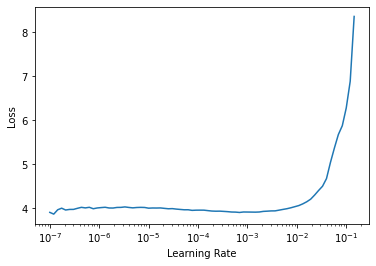

In [352]:
learn.lr_find()

In [353]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,perplexity,time
0,3.365177,3.328232,27.888979,50:22


A perplexity of 100 means that whenever the model is predicting the next word, the model is as confused as if it had to pick between 100 different words

In [354]:
#save model weights. Commented out since we don't need it now
learn.save("gpt2-finetuned-yelp-reviews-sample-1cycle-Automotive")

Path('models/gpt2-finetuned-yelp-reviews-sample-1cycle-Automotive.pth')

In [355]:
%cp /content/models/gpt2-finetuned-yelp-reviews-sample-1cycle-Automotive.pth /content/drive/MyDrive/YelpDataset/models

In [356]:
df_valid.head(1)

,index,reviewText
23307,3680710,"I was looking around to buy a car and a couple of my friends mentioned this establishment. I walked in and was greeted by Clairebelle Price. I told her that I wanted to look at certain types of cars and what I wanted to spend. She was so easy going and great personality, I was very happy to have her help me! \n\nWe found a couple off cars on the computer, I liked the looks and we went out to see them. The first one was not for me, the second one I really liked the looks and the price (the price is the price, no negotiation at CarMax) she said let's take it for a test drive? Of course, let'..."


### Review Example 1

In [357]:
prompt = "The car was not"

In [358]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 4])

In [359]:
preds = learn.model.generate(inp, max_length=70, num_beams=5, temperature=0.75, early_stopping=True, no_repeat_ngram_size=2)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [360]:
tokenizer.decode(preds[0].cpu().numpy())

'The car was not in the condition I wanted it to be. I was told it would be ready by the end of the day. \n\nThe next day, I received a call from the service department saying that the car had not been looked at yet, and that they would need to order the part for me to pick up my car.'

### Review Example 2



In [361]:
prompt = "The Toyota"

In [362]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 2])

In [363]:
preds = learn.model.generate(inp, max_length=100, num_beams=5, temperature=0.75, early_stopping=True, no_repeat_ngram_size=2)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [364]:
tokenizer.decode(preds[0].cpu().numpy())

'The Toyota Highlander I was interested in was in the exact color I wanted.  I went to the dealership to look at the vehicle and was told that the car had been sold to someone else and that it was not available for me to test drive.\n\nI went back to Toyota of Tampa Bay and spoke to a salesperson and told him that I would not be purchasing a vehicle from this dealership. He then proceeded to tell me that if I did not buy a car from them, they would'

### Review Example 3



In [365]:
prompt = "The BMW "

In [366]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 3])

In [367]:
preds = learn.model.generate(inp, max_length=60, num_beams=20, temperature=0.75, early_stopping=True, no_repeat_ngram_size=2, top_k=100)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [368]:
tokenizer.decode(preds[0].cpu().numpy())

'The BMW  has been in the shop for a couple of years now and I have never had a problem with the service department.  \n\nI would recommend this dealership to anyone looking to buy a new or used car.I went in for an oil change and tire rotation. I was told'

### Review Example 4



In [ ]:
prompt = "I came here about a month ago and I really like the massage"

In [ ]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 13])

In [ ]:
preds = learn.model.generate(inp, max_length=70, num_beams=4, temperature=0.75, early_stopping=True, no_repeat_ngram_size=3)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
tokenizer.decode(preds[0].cpu().numpy())

"I came here about a month ago and I really like the massage therapists. I've had a lot of massages in the past and this was by far the best one I've ever had. The staff is very friendly and the facility is very clean. I would definitely recommend this place to anyone looking for a great massage.I have been going to"